# # # Multiclass Fish Image Classification
# # ## Model 1: Custom CNN (From Scratch, Input Size 224x224)
# #
# # Steps:
# # - Build a CNN from scratch with input 224x224.
# # - Add dropout to reduce overfitting.
# # - Train for 20 epochs and save best model.

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import os
import matplotlib.pyplot as plt

In [4]:
base_dir = "C:/Users/HP/Downloads/Education/Data Science/GUvI/projects/Capstone project 5 All Details A to Z/Multiclass Fish Image Classification/data"
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")
img_size = (224, 224)
batch_size = 32


In [11]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.


In [5]:
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

cnn_model.summary()

C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │         2,827 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,248,395 (84.87 MB)

 Trainable params: 22,247,947 (84.87 MB)

 Non-trainable params: 448 (1.75 KB)

In [6]:
cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
cnn_history = cnn_model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator
)
cnn_loss, cnn_acc = cnn_model.evaluate(val_generator)
print(f"Custom CNN Accuracy: {cnn_acc*100:.2f}%")

C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 685s 3s/step - accuracy: 0.3923 - loss: 2.0661 - val_accuracy: 0.0888 - val_loss: 12.3547
Epoch 2/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 515s 3s/step - accuracy: 0.4954 - loss: 1.4925 - val_accuracy: 0.3288 - val_loss: 3.4187
Epoch 3/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 517s 3s/step - accuracy: 0.5680 - loss: 1.2688 - val_accuracy: 0.6419 - val_loss: 1.0580
Epoch 4/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 521s 3s/step - accuracy: 0.6145 - loss: 1.1384 - val_accuracy: 0.8150 - val_loss: 0.6511
Epoch 5/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 520s 3s/step - accuracy: 0.6572 - loss: 1.0262 - val_accuracy: 0.7647 - val_loss: 0.6535
Epoch 6/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 521s 3s/step - accuracy: 0.6871 - loss: 0.9376 - val_accuracy: 0.8288 - val_loss: 0.5242
Epoch 7/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 518s 3s/step - accuracy: 0.7178 - loss: 0.8324 - val_accuracy: 0.8425 - val_loss: 0.4918
Epoch 8/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 524s 3s/step - accuracy: 0.7382 - loss: 0.7601 - val_acc

In [8]:
cnn_model.save('models/custom_cnn_model.h5')
cnn_model.save('models/custom_cnn_model.keras')

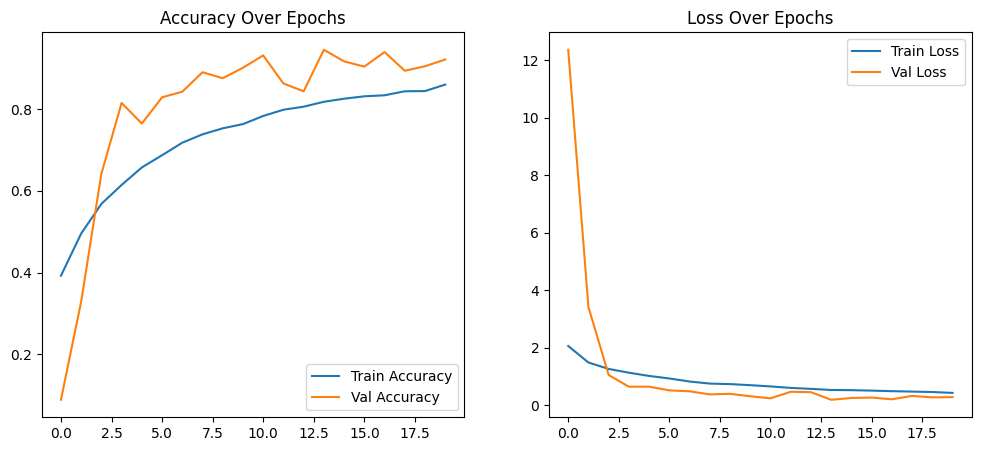

In [9]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.subplot(1,2,2)
plt.plot(cnn_history.history['loss'], label='Train Loss')
plt.plot(cnn_history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.show()

# # # Multiclass Fish Image Classification
# # ## Model 2: VGG16 (Transfer Learning)
# # 
# # Steps:
# # - Use the **VGG16 model pre-trained on ImageNet**.
# # - **Freeze the base layers** to keep the pre-learned image features.
# # - Add a **custom classification head** for our fish dataset.
# # - Train the model for **5-8 epochs**.

In [10]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam 

In [11]:
vgg_base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = vgg_base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

vgg_model = Model(inputs=vgg_base_model.input, outputs=output)
vgg_base_model.trainable = True

for layer in vgg_base_model.layers[:-4]:
    layer.trainable = False

vgg_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,781,771 (56.39 MB)

 Trainable params: 7,146,507 (27.26 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [12]:
vgg_model.compile(optimizer=Adam(learning_rate=1e-5),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [13]:
vgg_history = vgg_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5
)
vgg_loss, vgg_acc = vgg_model.evaluate(val_generator)
print(f"VGG16 Accuracy: {vgg_acc*100:.2f}%")

Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 2103s 11s/step - accuracy: 0.2863 - loss: 2.0588 - val_accuracy: 0.6410 - val_loss: 1.4259
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 2073s 11s/step - accuracy: 0.5989 - loss: 1.2409 - val_accuracy: 0.8269 - val_loss: 0.6954
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 2080s 11s/step - accuracy: 0.7446 - loss: 0.8195 - val_accuracy: 0.8974 - val_loss: 0.4579
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 2072s 11s/step - accuracy: 0.8111 - loss: 0.6085 - val_accuracy: 0.9341 - val_loss: 0.2957
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 2073s 11s/step - accuracy: 0.8598 - loss: 0.4685 - val_accuracy: 0.9487 - val_loss: 0.1974
35/35 ━━━━━━━━━━━━━━━━━━━━ 255s 7s/step - accuracy: 0.9487 - loss: 0.1974
VGG16 Accuracy: 94.87%


In [14]:
vgg_model.save('models/vgg_fish_model.h5')
vgg_model.save('models/vgg_fish_model.keras')

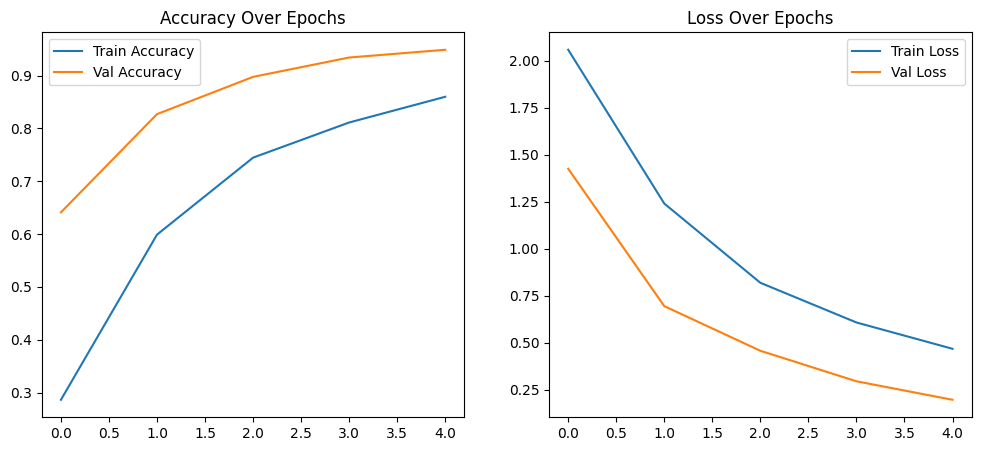

In [15]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(vgg_history.history['accuracy'], label='Train Accuracy')
plt.plot(vgg_history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.subplot(1,2,2)
plt.plot(vgg_history.history['loss'], label='Train Loss')
plt.plot(vgg_history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.show()



# # # Multiclass Fish Image Classification
# # ## Model 3: MobileNet (Transfer Learning)
# #
# # Steps:
# # - Use the **MobileNet model pre-trained on ImageNet**.
# # - **Freeze the base layers** to keep the pre-learned image features.
# # - Add a **custom classification head** for our fish dataset.
# # - Train the model for **10 epochs**.

In [16]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [17]:
mobilenet_base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = mobilenet_base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

mobilenet_model = Model(inputs=mobilenet_base_model.input, outputs=output)
mobilenet_base_model.trainable = True

for layer in mobilenet_base_model.layers[:-30]:
    layer.trainable = False

mobilenet_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,361,483 (12.82 MB)

 Trainable params: 2,528,267 (9.64 MB)

 Non-trainable params: 833,216 (3.18 MB)

In [18]:
mobilenet_model.compile(optimizer=Adam(learning_rate=1e-5),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

In [19]:
mobilenet_history = mobilenet_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)
mobilenet_loss, mobilenet_acc = mobilenet_model.evaluate(val_generator)
print(f"MobileNet Accuracy: {mobilenet_acc*100:.2f}%")

Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 306s 2s/step - accuracy: 0.2241 - loss: 2.4985 - val_accuracy: 0.5668 - val_loss: 1.4154
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 285s 1s/step - accuracy: 0.5279 - loss: 1.4339 - val_accuracy: 0.8709 - val_loss: 0.7772
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 286s 1s/step - accuracy: 0.7023 - loss: 0.9723 - val_accuracy: 0.9313 - val_loss: 0.4573
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 287s 1s/step - accuracy: 0.8048 - loss: 0.6749 - val_accuracy: 0.9634 - val_loss: 0.2856
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 284s 1s/step - accuracy: 0.8638 - loss: 0.5067 - val_accuracy: 0.9744 - val_loss: 0.1924
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 282s 1s/step - accuracy: 0.8938 - loss: 0.3917 - val_accuracy: 0.9799 - val_loss: 0.1350
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 284s 1s/step - accuracy: 0.9145 - loss: 0.3168 - val_accuracy: 0.9835 - val_loss: 0.1028
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 286s 1s/step - accuracy: 0.9353 - loss: 0.2563 - val_accu

In [20]:
mobilenet_model.save('models/mobilenet_fish_model.h5')
mobilenet_model.save('models/mobilenet_fish_model.keras')

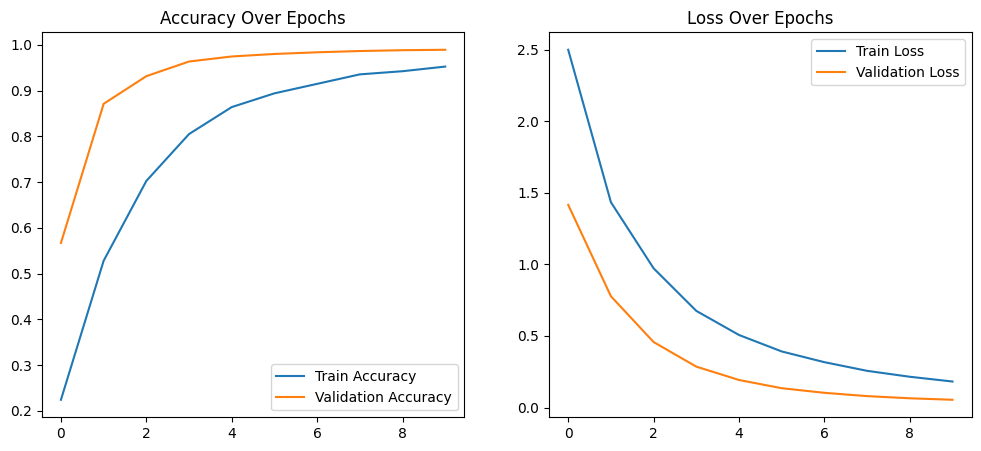

In [21]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(mobilenet_history.history['accuracy'], label='Train Accuracy')
plt.plot(mobilenet_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.subplot(1,2,2)
plt.plot(mobilenet_history.history['loss'], label='Train Loss')
plt.plot(mobilenet_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.show()


# # # Multiclass Fish Image Classification
# # ## Model 4: EfficientNetB0 (Transfer Learning)
# #
# # Steps:
# # - Use EfficientNetB0 pretrained on ImageNet.
# # - Freeze base layers.
# # - Add custom classification head.
# # - Train the model for 10 epochs.

In [15]:
from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [16]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb'
)

Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.


In [18]:
efficientnetv2_base = EfficientNetV2B0(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Build classification head
x = efficientnetv2_base.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

effv2_model = Model(inputs=efficientnetv2_base.input, outputs=output)

# Freeze most layers for transfer learning
for layer in efficientnetv2_base.layers[:-20]:
    layer.trainable = False
for layer in efficientnetv2_base.layers[-20:]:
    layer.trainable = True
effv2_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_4         │ (None, 224, 224,  │          0 │ input_layer_3[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_3     │ (None, 224, 224,  │          0 │ rescaling_4[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ normalization_3[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │      4,608 │ stem_activation[… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 112, 112,  │         64 │ block1a_project_… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_ac… │ (None, 112, 112,  │          0 │ block1a_project_… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_conv │ (None, 56, 56,    │      9,216 │ block1a_project_… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_bn   │ (None, 56, 56,    │        256 │ block2a_expand_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_act… │ (None, 56, 56,    │          0 │ block2a_expand_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_project_co… │ (None, 56, 56,    │      2,048 │ block2a_expand_a… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_project_bn  │ (None, 56, 56,    │        128 │ block2a_project_… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_conv │ (None, 56, 56,    │     36,864 │ block2a_project_… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_bn   │ (None, 56, 56,    │        512 │ block2b_expand_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_act… │ (None, 56, 56,    │          0 │ block2b_expand_b

 Total params: 6,084,699 (23.21 MB)

 Trainable params: 983,227 (3.75 MB)

 Non-trainable params: 5,101,472 (19.46 MB)

In [20]:
effv2_model.compile(optimizer=Adam(1e-5),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [21]:
effv2_history = effv2_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)
effv2_loss, effv2_acc = effv2_model.evaluate(val_generator)
print(f"EfficientNetV2B0 Accuracy: {effv2_acc*100:.2f}%")

Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 301s 1s/step - accuracy: 0.1092 - loss: 2.4414 - val_accuracy: 0.1703 - val_loss: 2.3645
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 314s 2s/step - accuracy: 0.1362 - loss: 2.3890 - val_accuracy: 0.1712 - val_loss: 2.3427
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 307s 2s/step - accuracy: 0.1431 - loss: 2.3742 - val_accuracy: 0.1712 - val_loss: 2.3310
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 308s 2s/step - accuracy: 0.1531 - loss: 2.3617 - val_accuracy: 0.1712 - val_loss: 2.3244
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 309s 2s/step - accuracy: 0.1553 - loss: 2.3485 - val_accuracy: 0.1712 - val_loss: 2.3182
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 317s 2s/step - accuracy: 0.1573 - loss: 2.3447 - val_accuracy: 0.1712 - val_loss: 2.3136
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 314s 2s/step - accuracy: 0.1619 - loss: 2.3389 - val_accuracy: 0.1712 - val_loss: 2.3116
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 299s 2s/step - accuracy: 0.1624 - loss: 2.3388 - val_accu

In [22]:
effv2_model.save('models/effv2_fish_model.h5')
effv2_model.save('models/effv2_fish_model.keras')

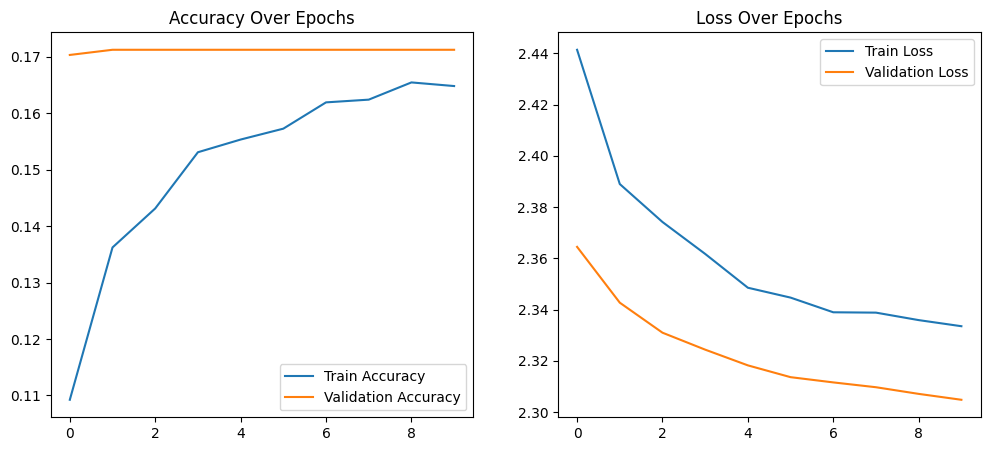

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(effv2_history.history['accuracy'], label='Train Accuracy')
plt.plot(effv2_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.subplot(1,2,2)
plt.plot(effv2_history.history['loss'], label='Train Loss')
plt.plot(effv2_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.show()


# # # Multiclass Fish Image Classification
# # ## Model 5: InceptionV3 (Transfer Learning)
# #
# # Steps:
# # - Use the **InceptionV3 model pre-trained on ImageNet**.
# # - Freeze the base layers.
# # - Add a **custom classification head** for our fish dataset.
# # - Train the model for **10 epochs**.

In [12]:
# Essential Imports
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [13]:
inception_base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = inception_base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

inception_model = Model(inputs=inception_base_model.input, outputs=output)
inception_base_model.trainable = True

for layer in inception_base_model.layers[:-50]:
    layer.trainable = False

inception_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_188 (Conv2D) │ (None, 111, 111,  │        864 │ input_layer_4[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 111, 111,  │         96 │ conv2d_188[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_188      │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_189 (Conv2D) │ (None, 109, 109,  │      9,216 │ activation_188[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_189[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_189      │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_190 (Conv2D) │ (None, 109, 109,  │     18,432 │ activation_189[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_190[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_190      │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 54, 54,    │          0 │ activation_190[0… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_191 (Conv2D) │ (None, 54, 54,    │      5,120 │ max_pooling2d_8[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_191[0][0]  │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_191      │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_192 (Conv2D) │ (None, 52, 52,    │    138,240 │ activation_191[0… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_192[0][0]  │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_192      │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 22,066,475 (84.18 MB)

 Trainable params: 7,437,003 (28.37 MB)

 Non-trainable params: 14,629,472 (55.81 MB)

In [17]:
inception_model.compile(optimizer=Adam(learning_rate=1e-5),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

In [18]:
inception_history = inception_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)
inception_loss, inception_acc = inception_model.evaluate(val_generator)
print(f"InceptionV3 Accuracy: {inception_acc*100:.2f}%")

C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 1597s 8s/step - accuracy: 0.4109 - loss: 1.8409 - val_accuracy: 0.8333 - val_loss: 0.9753
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 1171s 6s/step - accuracy: 0.7621 - loss: 0.9351 - val_accuracy: 0.9240 - val_loss: 0.4647
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 1007s 5s/step - accuracy: 0.8633 - loss: 0.5625 - val_accuracy: 0.9441 - val_loss: 0.2825
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 968s 5s/step - accuracy: 0.8972 - loss: 0.4093 - val_accuracy: 0.9570 - val_loss: 0.1966
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 896s 5s/step - accuracy: 0.9202 - loss: 0.3125 - val_accuracy: 0.9670 - val_loss: 0.1470
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 904s 4s/step - accuracy: 0.9311 - loss: 0.2590 - val_accuracy: 0.9698 - val_loss: 0.1168
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 928s 5s/step - accuracy: 0.9439 - loss: 0.2056 - val_accuracy: 0.9771 - val_loss: 0.0910
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 921s 5s/step - accuracy: 0.9528 - loss: 0.1753 - val_a

In [19]:
inception_model.save('models/inceptionv3_fish_model.h5')
inception_model.save('models/inceptionv3_fish_model.keras')

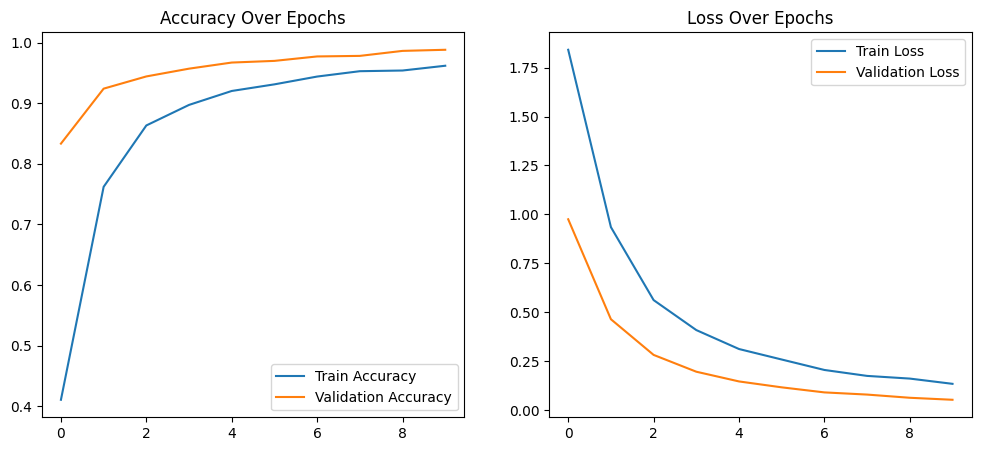

In [20]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(inception_history.history['accuracy'], label='Train Accuracy')
plt.plot(inception_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.subplot(1,2,2)
plt.plot(inception_history.history['loss'], label='Train Loss')
plt.plot(inception_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.show()

# # # Multiclass Fish Image Classification
# # ## Model 6: ResNet50 (Transfer Learning)
# #
# # Steps:
# # - Use ResNet50 pretrained on ImageNet.
# # - Freeze base layers.
# # - Add custom classifier head.
# # - Train for **10 epochs**.

In [9]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [10]:
resnet_base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = resnet_base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

resnet_model = Model(inputs=resnet_base_model.input, outputs=output)
resnet_base_model.trainable = True

for layer in resnet_base_model.layers[:-20]:
    layer.trainable = False

resnet_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,851,403 (90.99 MB)

 Trainable params: 9,195,019 (35.08 MB)

 Non-trainable params: 14,656,384 (55.91 MB)

In [11]:
resnet_model.compile(optimizer=Adam(learning_rate=1e-5),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [12]:
resnet_history = resnet_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)
resnet_loss, resnet_acc = resnet_model.evaluate(val_generator)
print(f"ResNet50 Accuracy: {resnet_acc*100:.2f}%")

C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 768s 4s/step - accuracy: 0.2064 - loss: 2.2582 - val_accuracy: 0.1484 - val_loss: 2.5073
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 736s 4s/step - accuracy: 0.3030 - loss: 2.0108 - val_accuracy: 0.3077 - val_loss: 2.1506
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 747s 4s/step - accuracy: 0.3497 - loss: 1.8842 - val_accuracy: 0.4963 - val_loss: 1.6755
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 744s 4s/step - accuracy: 0.4040 - loss: 1.7650 - val_accuracy: 0.5577 - val_loss: 1.4556
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 740s 4s/step - accuracy: 0.4318 - loss: 1.6788 - val_accuracy: 0.5833 - val_loss: 1.3502
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 736s 4s/step - accuracy: 0.4469 - loss: 1.6038 - val_accuracy: 0.6364 - val_loss: 1.1967
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 732s 4s/step - accuracy: 0.4744 - loss: 1.5188 - val_accuracy: 0.5833 - val_loss: 1.2190
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 759s 4s/step - accuracy: 0.5067 - loss: 1.4681 - val_accu

In [15]:
resnet_model.save('models/resnet50_fish_model.h5')
resnet_model.save('models/resnet50_fish_model.keras')

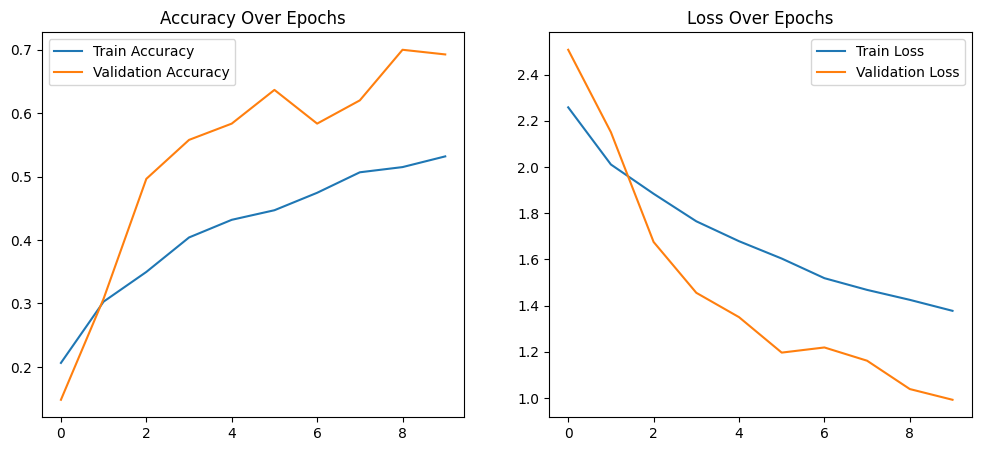

In [16]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(resnet_history.history['accuracy'], label='Train Accuracy')
plt.plot(resnet_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.subplot(1,2,2)
plt.plot(resnet_history.history['loss'], label='Train Loss')
plt.plot(resnet_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.show()